In [29]:
import pandas as pd
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df = df.drop(['PassengerId', 'Name','SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
display(df.head())

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [31]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


In [32]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
display(df.isnull().sum())

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [33]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
display(df.head())

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [36]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [37]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 4) (179, 4) (712,) (179,)


In [38]:
df1=([x_test,y_test])
df1

[     Pclass  Sex        Age     Fare
 456       1    1  65.000000  26.5500
 351       1    1  29.699118  35.0000
 173       3    1  21.000000   7.9250
 671       1    1  31.000000  52.0000
 836       3    1  21.000000   8.6625
 ..      ...  ...        ...      ...
 877       3    1  19.000000   7.8958
 35        1    1  42.000000  52.0000
 814       3    1  30.500000   8.0500
 363       3    1  35.000000   7.0500
 871       1    0  47.000000  52.5542
 
 [179 rows x 4 columns],
 456    0
 351    0
 173    0
 671    0
 836    0
       ..
 877    0
 35     0
 814    0
 363    0
 871    1
 Name: Survived, Length: 179, dtype: int64]

In [41]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
ypred=lr.predict(x_test)
ypred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [44]:
ypred=lr.predict([[3,1,23.0,7.8958]])
print( ypred)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [45]:
y_test

,Survived
456,0
351,0
173,0
671,0
836,0
...,...
877,0
35,0
814,0
363,0


In [46]:
from sklearn.metrics import accuracy_score

# Re-generate predictions on the entire x_test dataset
ypred = lr.predict(x_test)

accuracy = accuracy_score(y_test, ypred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 75.42%


In [47]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[80 20]
 [24 55]]


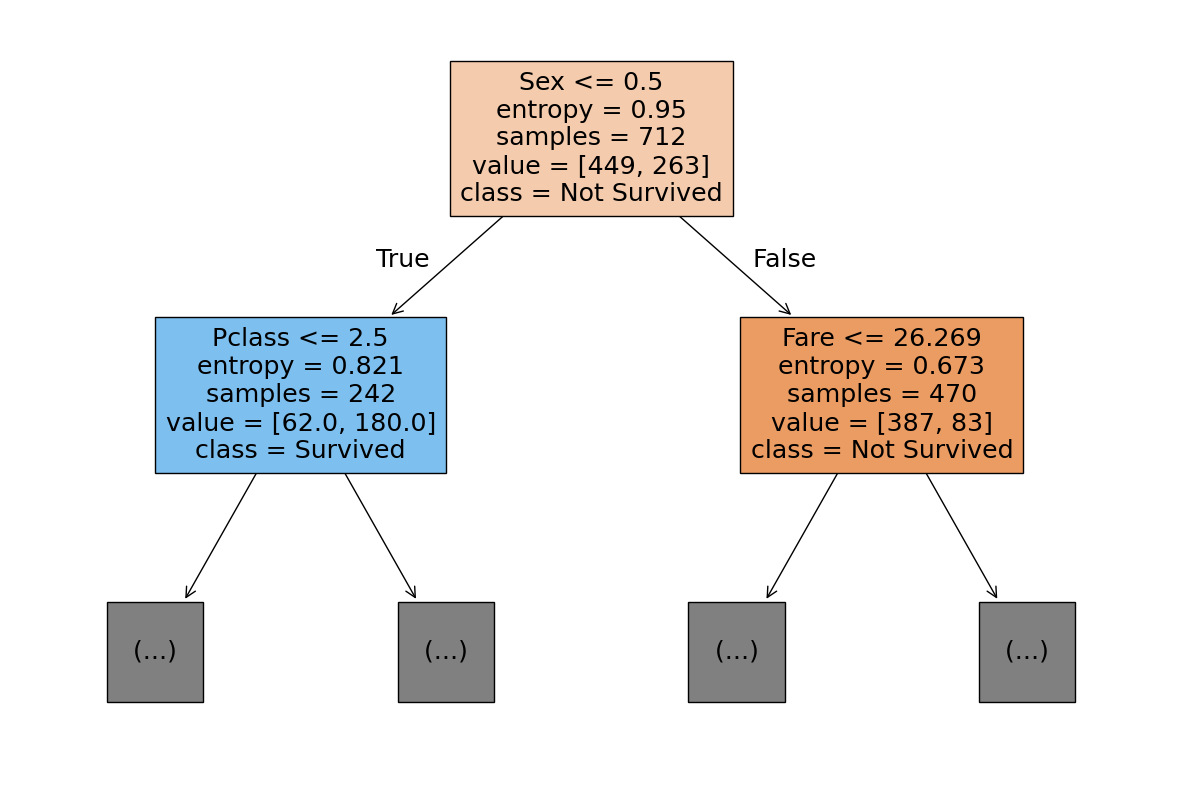

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, feature_names=x.columns, class_names=['Not Survived', 'Survived'], max_depth=1)
plt.show()